In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Thyroid_Diff.csv')
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


## data cleaning

In [3]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [4]:
data.duplicated().sum()

19

In [5]:
#We drop duplicates values and just keep one of them
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

This dataset is already cleaned. 

## data visualization

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


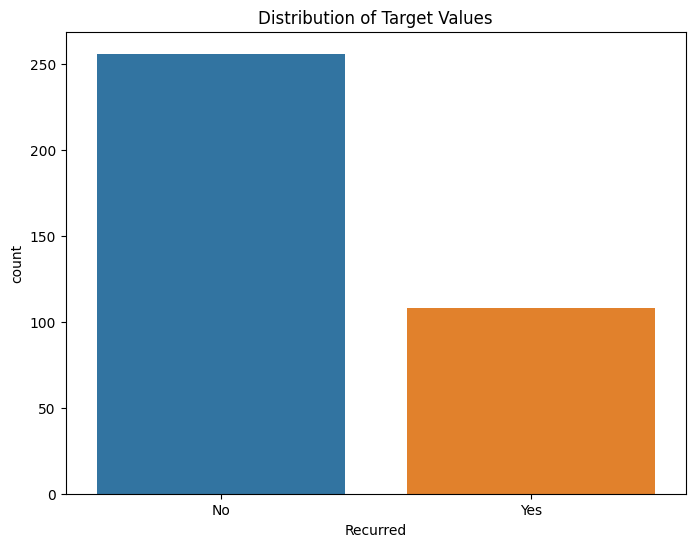

percentage of reccured tyroid disease is 0.7032967032967034
percentage of not reccured tyroid disease is 0.7032967032967034


In [8]:
#we print histogram of target value
target=data['Recurred']
plt.figure(figsize=(8,6))
sns.countplot(x=target)
plt.title('Distribution of Target Values')
plt.show()

yes=target.value_counts()[0]/len(target)
no=target.value_counts()[0]/len(target)
print(f'percentage of reccured tyroid disease is {yes}')
print(f'percentage of not reccured tyroid disease is {no}')

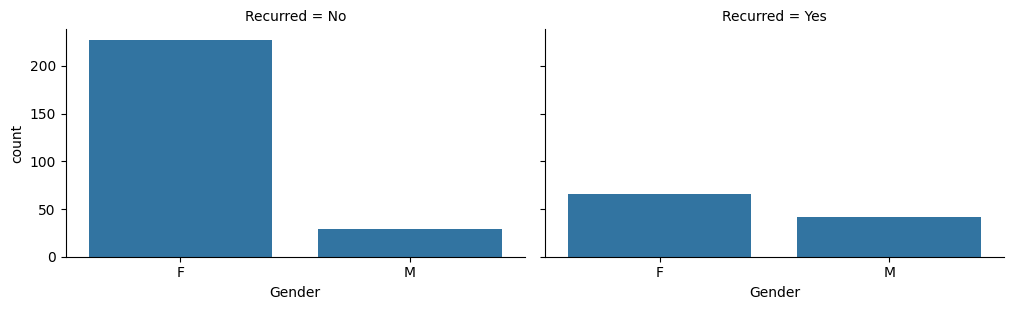

In [9]:
#Gender reccured
grid = sns.FacetGrid(data, col='Recurred', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender', order=sorted(data['Gender'].unique()))
plt.show()

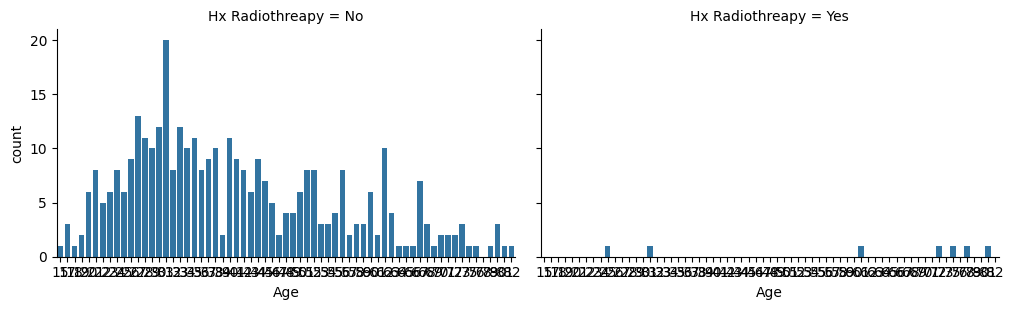

In [10]:
#Age of people who is have already radiotherapy
grid = sns.FacetGrid(data, col='Hx Radiothreapy', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Age', order=sorted(data['Age'].unique()))
plt.show()

<Axes: ylabel='count'>

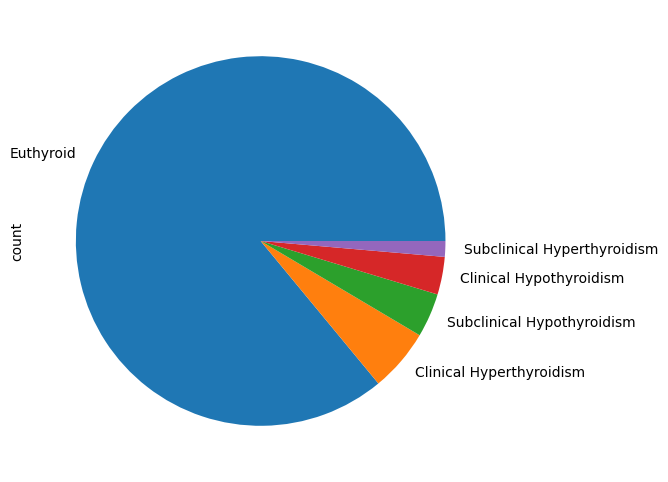

In [11]:
#distribution of Thyroid Function
plt.figure(figsize=(6,6))
data["Thyroid Function"].value_counts().plot.pie()

Euthyroid: fonctionnement normal de la glande thyroïde
Clinical hyperthyroidism: fonctionnement excessif de la thyroïde
Clinical hypothyroidism: fonctionnement inssuffisant de la thyroïde
Subclinical hyperthyroidism: taux de TSH légèrement élevé mais taux de T3 et T4 restent dans la normale
Subclinical hypothyroidism: taux de TSH légèrement bas mais taux de T3 et T4 restent dans la normale

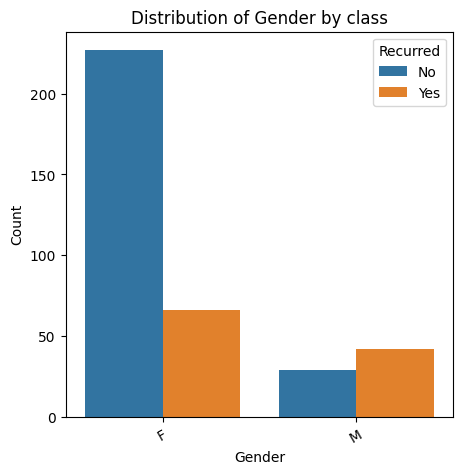

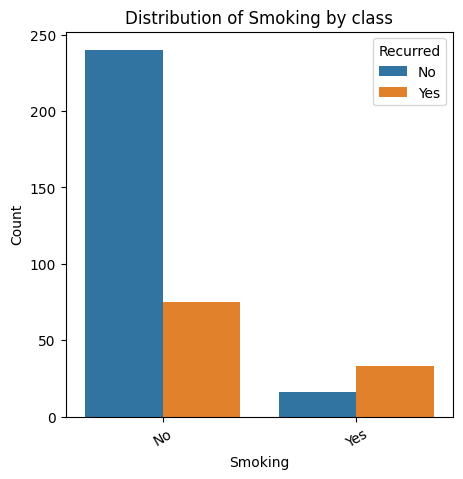

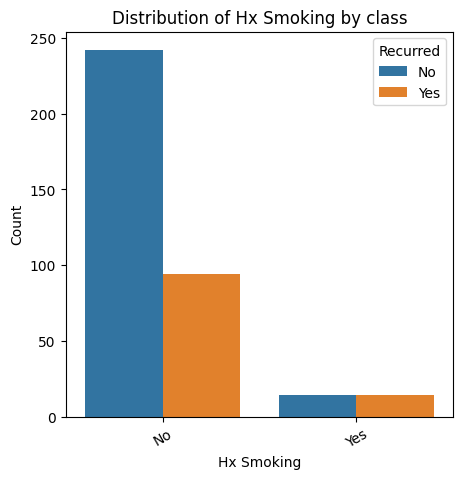

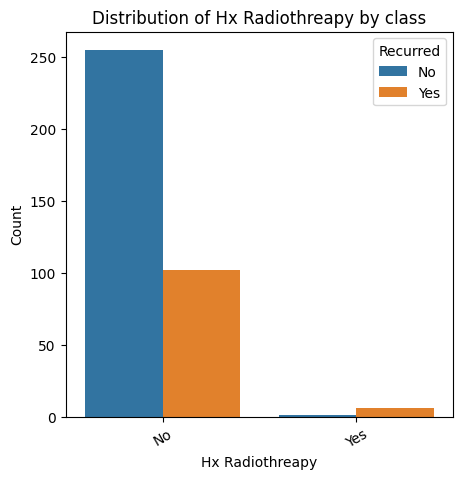

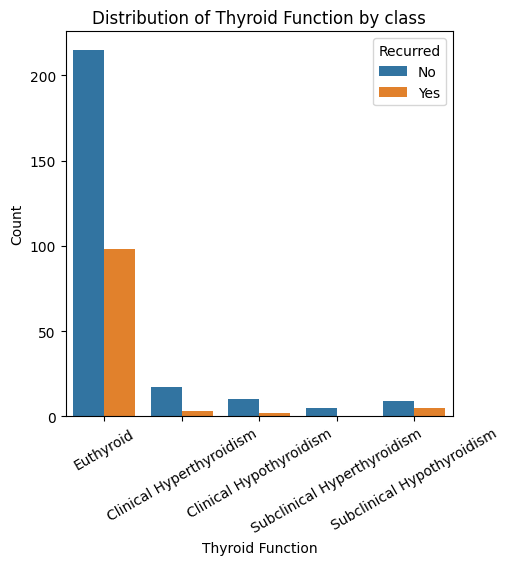

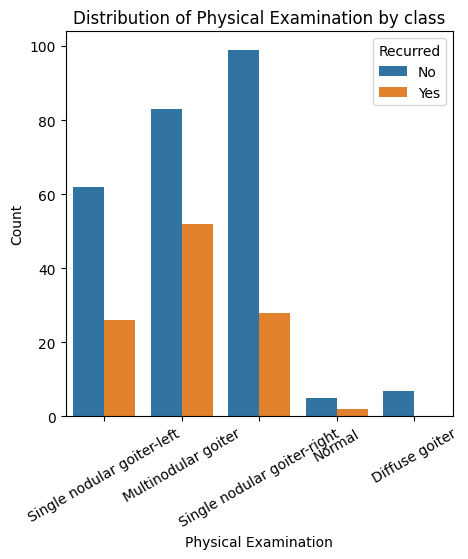

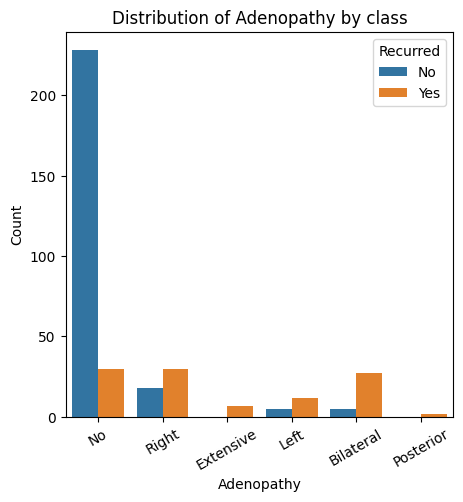

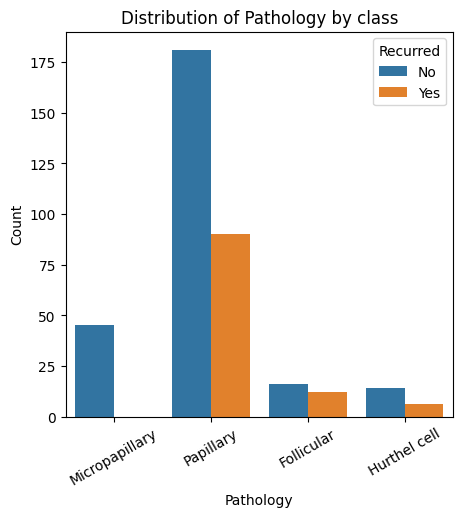

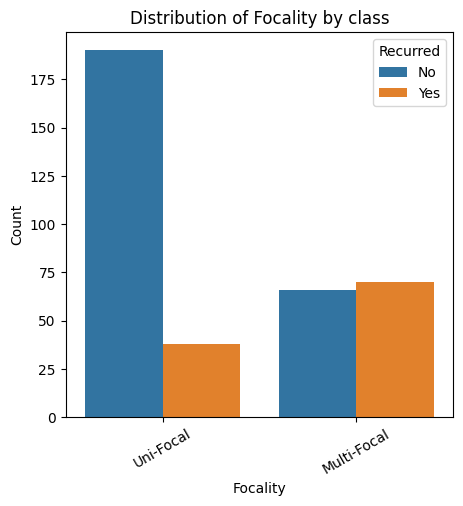

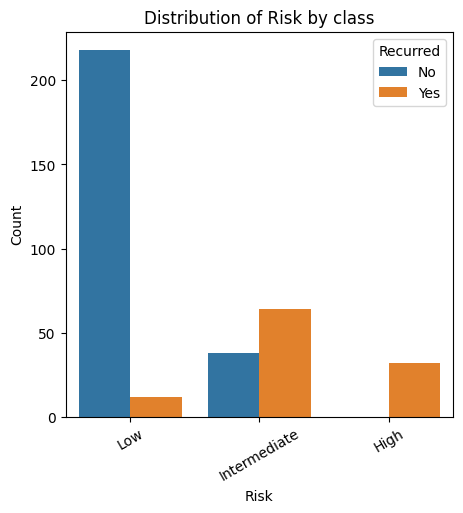

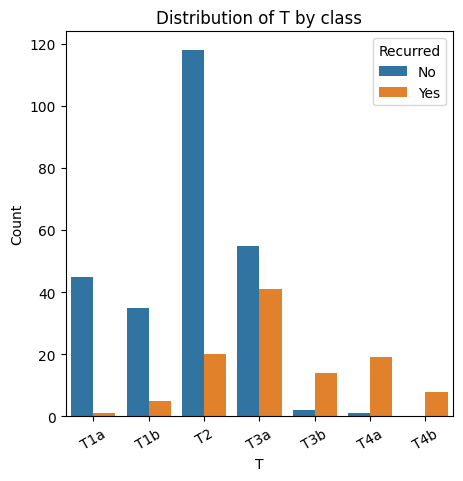

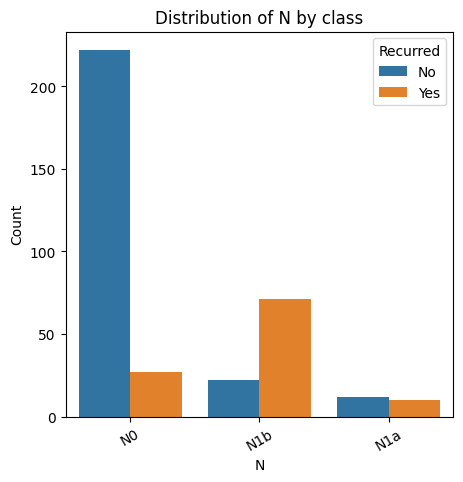

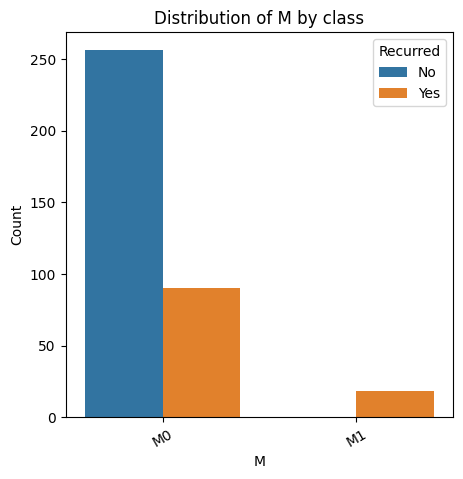

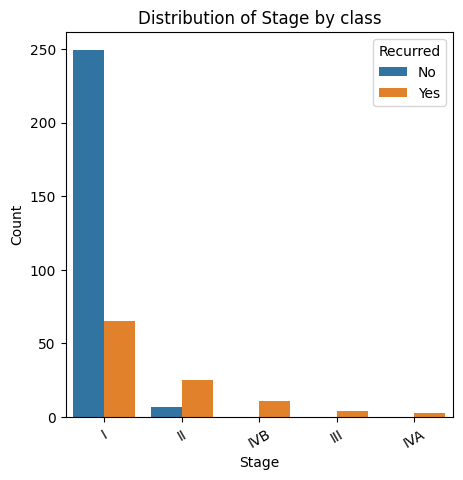

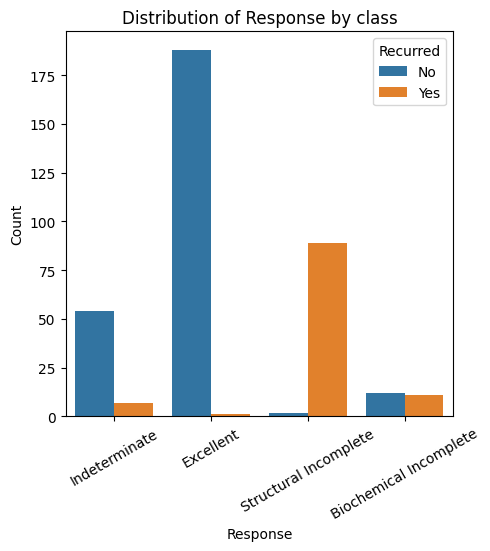

In [12]:
for i in range (1, 16):
    column_name=data.columns[i]
    plt.figure(figsize=(5,5))
    sns.countplot(x=column_name, data=data, hue='Recurred')
    plt.title(f'Distribution of {column_name} by class')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()

In [13]:
data.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


In [49]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,1,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,1,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,1,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,1,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,1,0,1,0


# Data preparation

In [15]:
#We convert categorical values into numerical values. We start with Gender column
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
data['Gender']=list(map(lambda gender: 1 if gender == 'M' else 0, data['Gender']))

/tmp/ipykernel_7300/3081581981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender']=list(map(lambda gender: 1 if gender == 'M' else 0, data['Gender']))


In [19]:
#We convert categorical values into numerical values. We work on Smoking column
data['Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data['Smoking']=list(map(lambda smoking: 1 if smoking == 'Yes' else 0, data['Smoking']))

/tmp/ipykernel_7300/1111961690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Smoking']=list(map(lambda smoking: 1 if smoking == 'Yes' else 0, data['Smoking']))


In [22]:
#We convert categorical values into numerical values. We work on Hx Radiothreapy column
data['Hx Radiothreapy'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
data['Hx Radiothreapy'] = data['Hx Radiothreapy'].apply(lambda x: 1 if x == 'Yes' else 0)

/tmp/ipykernel_7300/2839383567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hx Radiothreapy'] = data['Hx Radiothreapy'].apply(lambda x: 1 if x == 'Yes' else 0)


In [25]:
#We convert categorical values into numerical values. We work on Hx Smoking column
data['Hx Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
data['Hx Smoking'] = data['Hx Smoking'].apply(lambda x: 1 if x == 'Yes' else 0)

/tmp/ipykernel_7300/1667101983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hx Smoking'] = data['Hx Smoking'].apply(lambda x: 1 if x == 'Yes' else 0)


In [29]:
#We convert categorical values into numerical values. We work on Focality column
data['Focality'].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [30]:
data['Focality'] = data['Focality'].apply(lambda x: 1 if x == 'Uni-Focal' else 0)

/tmp/ipykernel_7300/3963997093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Focality'] = data['Focality'].apply(lambda x: 1 if x == 'Uni-Focal' else 0)


In [35]:
data['M'].unique()

array(['M0', 'M1'], dtype=object)

In [36]:
data['M'] = data['M'].apply(lambda x: 1 if x == 'M0' else 0)

/tmp/ipykernel_7300/1034188875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['M'] = data['M'].apply(lambda x: 1 if x == 'M0' else 0)


In [41]:
data['Recurred'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
data['Recurred'] = data['Recurred'].map(lambda x: 1 if x == 'Yes' else 0)

/tmp/ipykernel_7300/2006580142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Recurred'] = data['Recurred'].map(lambda x: 1 if x == 'Yes' else 0)


In [48]:
from sklearn.preprocessing import LabelEncoder

# Colonnes à encoder
columns_to_encode = ['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Risk', 'T', 'N', 'Stage', 'Response']

# Dictionnaire pour stocker les LabelEncoders pour chaque colonne
label_encoders = {}
# Dictionnaire pour stocker les mappings inverse
reverse_mappings = {}

# Boucle pour encoder chaque colonne
for column in columns_to_encode:
    # Créer un nouvel encodeur pour la colonne
    le = LabelEncoder()
    # Encoder les données
    data[column] = le.fit_transform(data[column])
    # Stocker l'encodeur pour une utilisation ultérieure (inverser l'encodage)
    label_encoders[column] = le
    # Stocker le mapping inverse
    reverse_mappings[column] = {index: label for index, label in enumerate(le.classes_)}

# Exemple d'accès aux valeurs originales
# Supposons que nous voulons voir les valeurs originales pour la colonne 'Risk' avec la valeur encodée 2
original_value = reverse_mappings['Risk'][2]
print("La valeur originale pour l'index encodé 2 dans 'Risk' est :", original_value)

La valeur originale pour l'index encodé 2 dans 'Risk' est : Low


/tmp/ipykernel_7300/3680134569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
/tmp/ipykernel_7300/3680134569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
/tmp/ipykernel_7300/3680134569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

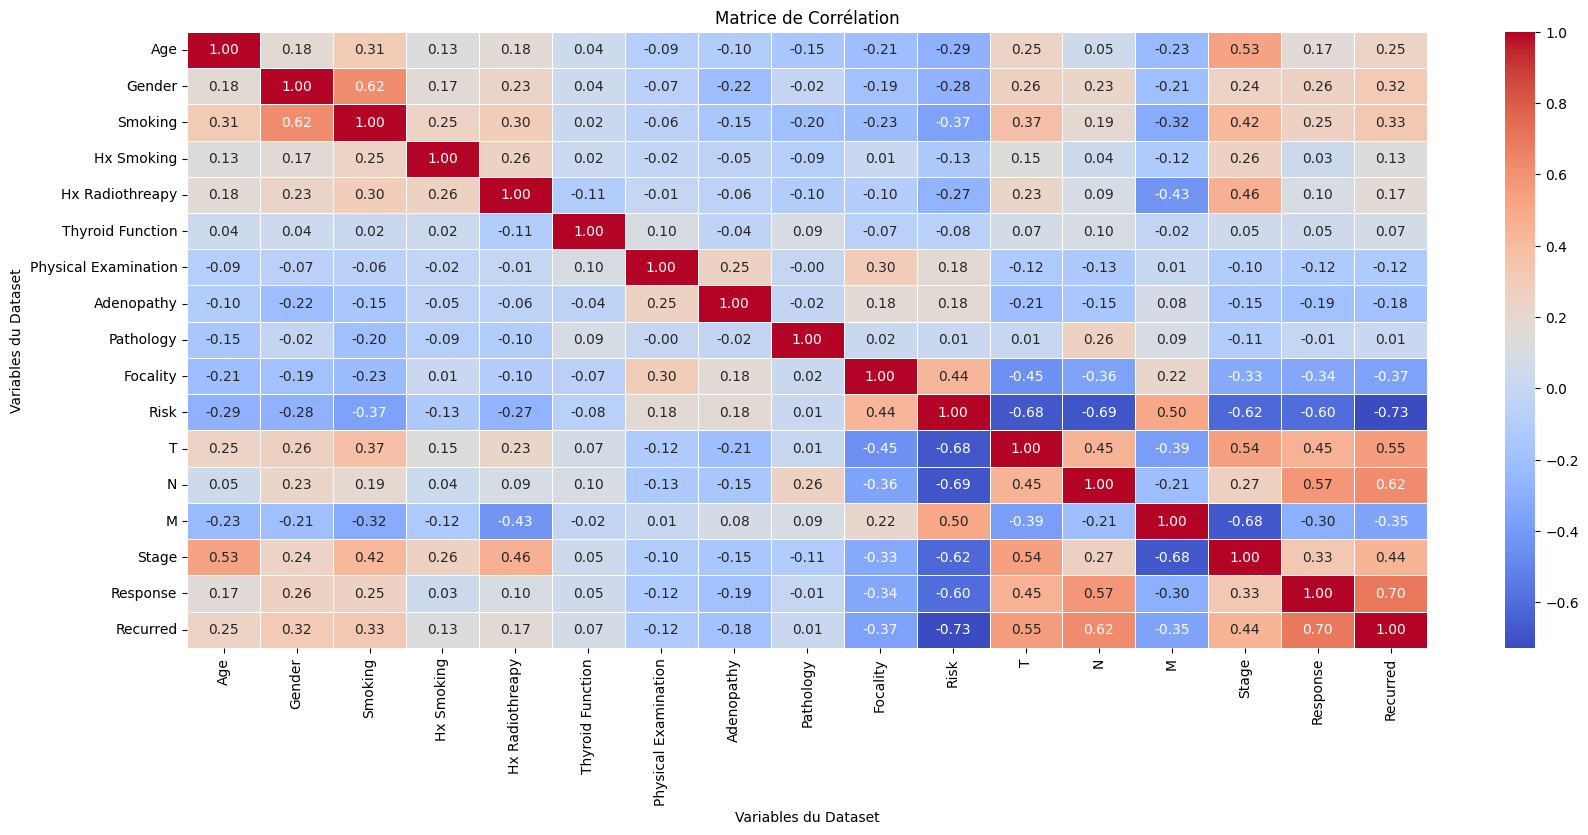

In [50]:
corr=data.corr()
# Configuration de la taille de la figure
plt.figure(figsize=(20, 8))

# Création de la heatmap de la matrice de corrélation
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)

# Ajout du titre et des labels
plt.title('Matrice de Corrélation')
plt.xlabel('Variables du Dataset')
plt.ylabel('Variables du Dataset')

# Affichage du graphique
plt.show()

# Divide dataset into train and test

In [51]:
from sklearn.model_selection import train_test_split

# X will contain all columns except'Response'
X = data.drop('Response', axis=1)
# y will only contain the column 'Response'
y = data['Response']
# we divide dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Test set size:", y_test.shape)

Training set size: (291, 16)
Test set size: (73, 16)
Training set size: (291,)
Test set size: (73,)


# Training model

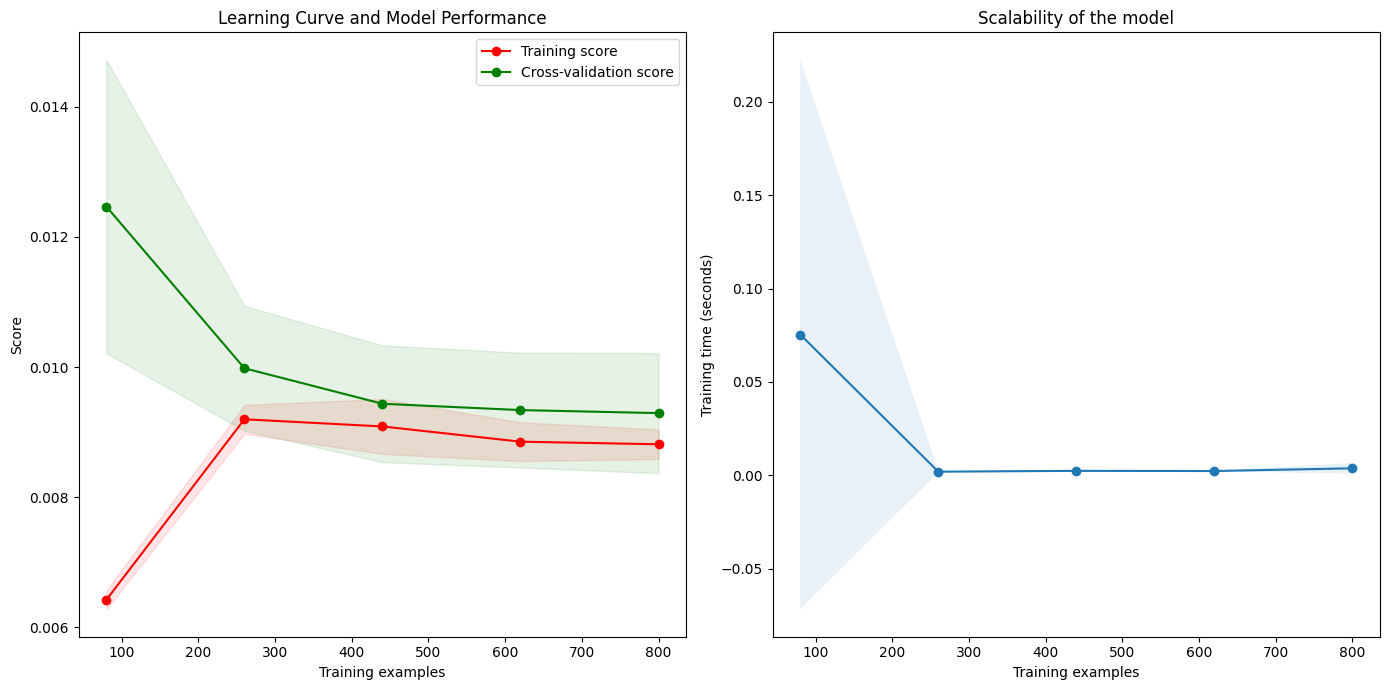

In [54]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Générer des données de régression synthétiques comme exemple
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Créer une instance du modèle
model = LinearRegression()

# Configuration de la learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5,
    scoring='neg_mean_squared_error', return_times=True)

# Calcul des moyennes et des écarts types des scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calcul des moyennes et des écarts types des temps de fit
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Fonction pour tracer les résultats
def plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, title):
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")

    plt.subplot(122)
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Training time (seconds)")

    plt.tight_layout()
    plt.show()

# Appeler la fonction d'affichage
plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, 'Learning Curve and Model Performance')

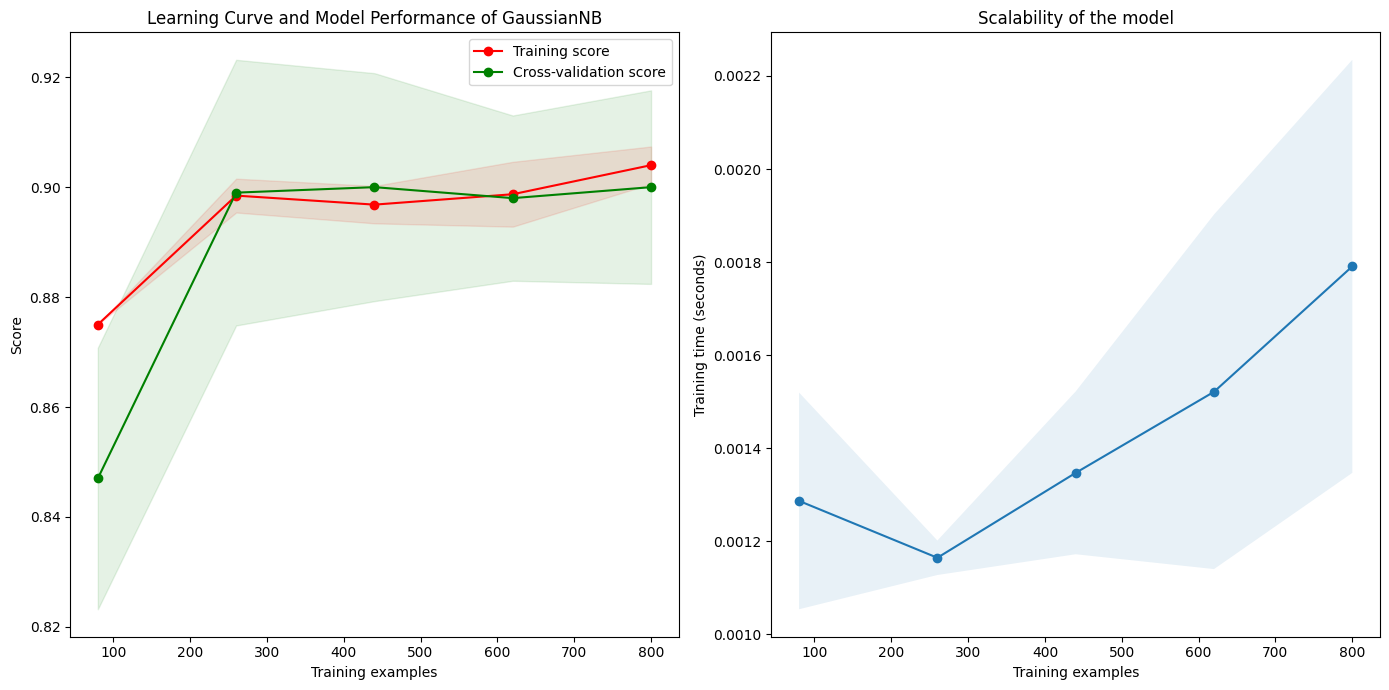

In [55]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Générer des données de classification synthétiques comme exemple
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Créer une instance du modèle Gaussian Naive Bayes
model = GaussianNB()

# Configuration de la learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5,
    scoring='accuracy', return_times=True)

# Calcul des moyennes et des écarts types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calcul des moyennes et des écarts types des temps de fit
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Fonction pour tracer les résultats
def plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, title):
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")

    plt.subplot(122)
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Training time (seconds)")

    plt.tight_layout()
    plt.show()

# Appeler la fonction d'affichage
plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, 'Learning Curve and Model Performance of GaussianNB')

In [62]:
#We apply three algorith Linear regression, KNN, Decision tree
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42),
    'GaussianNB': GaussianNB()
}

#precision function
def precision_function(Y_true, Y_pred, retu=False):
    acc=accuracy_score(Y_true, Y_pred)
    if retu:
        return acc
    else:
        print(f'Precision of model is: {acc}')

#evaluation model
def train_test_eval(models, X_train, Y_train, X_test, Y_test):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(X_train, Y_train)
        precision_function(Y_test, model.predict(X_test))
        print('-'*30)
        
train_test_eval(models, X_train, y_train, X_test, y_test)

LogisticRegression:
Precision of model is: 0.6986301369863014
------------------------------
KNeighborsClassifier:
Precision of model is: 0.6575342465753424
------------------------------
DecisionTreeClassifier:
Precision of model is: 0.7671232876712328
------------------------------
GaussianNB:
Precision of model is: 0.5753424657534246
------------------------------


/home/laureoby/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Les informations que tu as fournies sont des mesures de précision pour quatre modèles différents appliqués sur un jeu de données pour une tâche de classification. La précision (precision) est une métrique utilisée pour évaluer la qualité des modèles de classification. Voici comment chaque valeur peut être interprétée :

    LogisticRegression:
        Précision : 0.6986
        Cela signifie que lorsque le modèle prédit positivement, il est correct 69.86% du temps. En d'autres termes, parmi toutes les prédictions positives (où le modèle prédit la classe positive), environ 69.86% sont effectivement des vrais positifs (correctement prédits).

    KNeighborsClassifier:
        Précision : 0.6575
        Pour le classificateur K-Nearest Neighbors, 65.75% des prédictions positives sont correctes. Ce modèle est donc légèrement moins précis que le modèle de régression logistique dans l'identification correcte des cas positifs.

    DecisionTreeClassifier:
        Précision : 0.7671
        Ce modèle a la précision la plus élevée parmi ceux que tu as testés. 76.71% des prédictions positives de ce modèle sont correctes, ce qui suggère qu'il est relativement meilleur pour identifier correctement les instances positives que les autres modèles testés.

    GaussianNB:
        Précision : 0.5753
        Le classificateur bayésien naïf gaussien a la précision la plus faible avec seulement 57.53% de prédictions positives correctes. Cela peut indiquer que ce modèle est moins efficace pour ce jeu de données spécifique, ou il pourrait être affecté par des hypothèses de distribution des caractéristiques qui ne tiennent pas.

Implications pour le choix du modèle :

    Choix du modèle: Selon ces résultats, le DecisionTreeClassifier serait le plus performant en termes de précision pour ce problème spécifique, suivi par le LogisticRegression. Le choix final peut cependant dépendre d'autres facteurs tels que la sensibilité, la spécificité, l'exactitude, le rappel, ou d'autres considérations comme le temps de formation et l'interprétabilité du modèle.
    Optimisation: Pour les modèles avec des performances inférieures, comme le GaussianNB et le KNeighborsClassifier, il peut être utile d'explorer d'autres techniques d'optimisation, telles que le réglage des hyperparamètres ou l'utilisation de techniques d'ingénierie des caractéristiques pour voir si leurs performances peuvent être améliorées.
    Évaluation complémentaire: Il est également crucial de considérer d'autres métriques d'évaluation et de réaliser une validation croisée pour s'assurer que les modèles généralisent bien sur de nouvelles données, au-delà de la simple précision.